In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Sellers

🎯 Our goal is to identify sellers who consistently underperform compared to others and understand why.  
This will help us shape recommendations to improve Olist's future profit margins.

## 1 - `olist/seller.py`

`order.py` uses a similar process; we have provided the `olist/seller.py` module, which includes the `Seller` class and the `Seller().get_training_data` method. This method returns a DataFrame with the following features:

| feature_name | type | description |
| --- | --- | --- |
| `seller_id` | str | seller's unique identifier (UNIQUE) |
| `seller_city` | str | seller's city |
| `seller_state` | str | seller's state |
| `delay_to_carrier` | float | returns 0 if the order was delivered before `shipping_limit_date`; otherwise returns the delay duration |
| `wait_time` | float | average delivery time (wait time) per seller |
| `date_first_sale` | datetime | date of the first sale on Olist |
| `date_last_sale` | datetime | date of the last sale on Olist |
| `months_on_olist` | float | approximate number of months on Olist |
| `share_of_five_stars` | float | share of five-star reviews for orders involving this seller |
| `share_of_one_stars` | float | share of one-star reviews for orders involving this seller |
| `review_score` | float | average review score for orders involving this seller |
| `n_orders` | int | number of unique orders involving this seller |
| `quantity` | int | total number of items sold by this seller |
| `quantity_per_order` | float | average number of items per order for this seller |
| `sales` | float | total sales amount associated with this seller (excluding freight), in BRL |

❓ **Import your new class below and inspect your training dataframe!** Take time to read the code and understand exactly what is being computed for you.

In [3]:
from olist.seller import Seller

sellers = Seller().get_training_data()
sellers.head()

/Users/yaren/code/ds_projects/sprint-15/olist/seller.py:66: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(delay_to_logistic_partner)\
/Users/yaren/code/ds_projects/sprint-15/olist/seller.py:71: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(order_wait_time)\


,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_one_stars,share_of_five_stars,review_score
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000,218.70,0.333333,0.333333,3.00
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025,11703.07,0.050000,0.725000,4.55
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000,158.00,0.000000,1.000000,5.00
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000,79.99,0.000000,1.000000,5.00
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000,167.99,1.000000,0.000000,1.00


🤔 There is still something to compute for each seller:
- Share of extremely high ratings (`share_of_five_stars`) and extremely low ratings (`share_of_one_stars`)
- (Average) `review_score`

😱 Each low-rated order hurts Olist's reputation; this impact is modeled with `cost_of_review`.

This will later help us compute the total `cost_of_review` for each seller!

❓ **Your last method to fill in: implement `get_review_score()`.**

In [4]:
from olist.seller import Seller

sellers = Seller().get_review_score()
sellers.head()

,seller_id,share_of_one_stars,share_of_five_stars,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,0.333333,0.666667,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,0.121827,0.527919,3.984772
2,001e6ad469a905060d959994f1b41e4f,1.000000,0.000000,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,0.137255,0.529412,3.901961
4,003554e2dce176b5555353e4f3555ac8,0.000000,1.000000,5.000000


🧪 Test your code below

In [5]:
from nbresult import ChallengeResult

tmp = Seller().get_training_data()
result = ChallengeResult('seller',
    shape = tmp.shape,
    median = tmp.review_score.median(),
    columns = tmp.columns
)
result.write()
print(result.check())

/Users/yaren/code/ds_projects/sprint-15/olist/seller.py:66: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(delay_to_logistic_partner)\
/Users/yaren/code/ds_projects/sprint-15/olist/seller.py:71: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(order_wait_time)\


## 2 - Exploring Sellers

### (2.1) Visualizations

Let's start with some ***`EDA - Exploratory Data Analysis`*** on these sellers.

👉 Look at summary statistics for `sellers`. What is the median number of orders per seller ❓

In [6]:
# use the `tmp` dataframe which contains the 'n_orders' column
tmp.describe()

tmp["n_orders"].median()

np.float64(7.0)

👉 Next, we will plot the distribution of each numerical variable in one big figure.

The code is provided; just run the cell.

- 👀 Do you notice any outliers?
- What does the distribution of order counts look like ❓

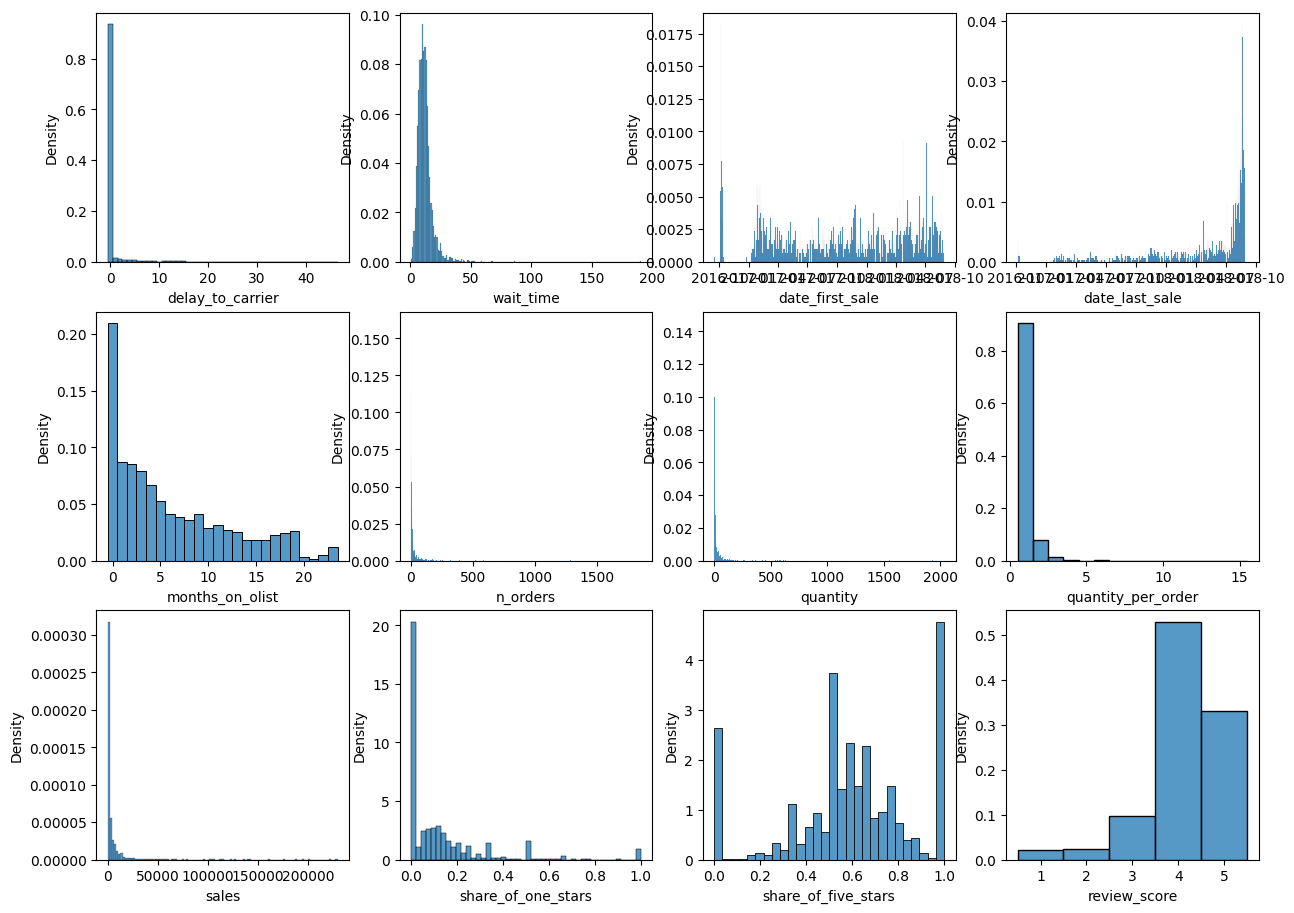

In [25]:
plt.figure(figsize=(15,11))
for (i, col) in enumerate(sellers.describe().columns):#["wait_time", "delay_to_carrier", "avg_review_score", "n_orders", "quantity", "price"]):
    plt.subplot(3,4,i+1)
    sns.histplot(sellers[col], kde=False, stat='density', discrete=[True,None][col in ['share_of_one_stars','share_of_five_stars','sales']]);

💡 It looks like a group of sellers with very low review scores stands out!

📊 Let's inspect visually:
- Using `plotly`, create a scatterplot showing the relationship between `delay_to_carrier` and `wait_time`; bubble size is the seller's total `sales`, and color is `review_score`.

We'll cover `plotly` in more detail later; for now just run the cell below.

In [20]:
import plotly.express as px
fig = px.scatter(data_frame = tmp[tmp['review_score'] < 4],
    x="wait_time",
    y="delay_to_carrier",
    size="sales",
    color="review_score",
    size_max = 100,
    opacity = 0.5
)
fig.show()

### (2.2) Modeling `review_score` with OLS

⚠️ Scatterplots let us visually analyze the data, but they have limits: they involve trial and error and we only assess relationships qualitatively.

💡 A more robust way to explain sellers' `review_score` is to use **multivariate OLS** in `statsmodels` to model the effect of several features on `review_score`.

Let's build an OLS using the numerical features you want.

👉 To compare regression coefficients, first standardize your features using the `standardize` function below.

In [21]:
def standardize(df, features):
    """Standardize specified numerical features in a DataFrame using z-score.

    Parameters
    ----------
    df : pandas.DataFrame
        Input dataframe.
    features : list of str
        List of column names to standardize.

    Returns
    -------
    pandas.DataFrame
        A copy of the original dataframe where the specified features have been
        standardized to zero mean and unit variance. Other columns are left
        unchanged.
    """
    df_standardized = df.copy()
    mu = df[features].mean()
    sigma = df[features].std()
    df_standardized[features] = (df[features] - mu) / sigma
    return df_standardized

In [23]:
features = [
    "delay_to_carrier",
    "wait_time",
    "months_on_olist",
    "share_of_one_stars",
    "share_of_five_stars",
    "n_orders",
    "quantity",
    "quantity_per_order",
    "sales",
]

sellers_standardized = standardize(sellers, features)
sellers_standardized[features].head()


,delay_to_carrier,wait_time,months_on_olist,share_of_one_stars,share_of_five_stars,n_orders,quantity,quantity_per_order,sales
0,-0.167974,0.124366,-0.347812,1.127373,-0.936066,-0.285964,-0.287186,-0.357945,-0.306525
1,-0.167974,-0.434800,1.295432,-0.374223,0.466754,0.059240,0.025534,-0.301070,0.502699
2,-0.167974,-1.145404,-1.005109,-0.639211,1.451714,-0.304624,-0.303645,-0.357945,-0.310802
3,-0.167974,-0.915549,-1.005109,-0.639211,1.451714,-0.304624,-0.303645,-0.357945,-0.316299
4,1.292828,3.278353,-1.005109,4.660539,-2.129957,-0.304624,-0.303645,-0.357945,-0.310098


👉 Next, build and fit an OLS model.

In [27]:
model = smf.ols(formula=f"review_score ~ {'+ '.join(features)}", data=sellers_standardized).fit()

❓ Which features are most influential?

👉 Plot a 📊 `bar_plot` with sorted coefficients.

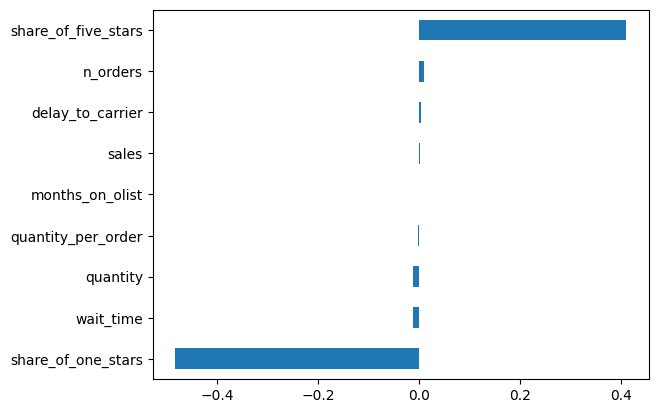

In [29]:
model.params[1:].sort_values().plot(kind="barh");

👉 Finally, inspect your model performance (`R-squared`) and the `residuals`.

In [30]:
model.rsquared

np.float64(0.9438212866669632)

👉 Compare actual review scores and the model's predicted scores on the same chart.

<Axes: xlabel='review_score', ylabel='Density'>

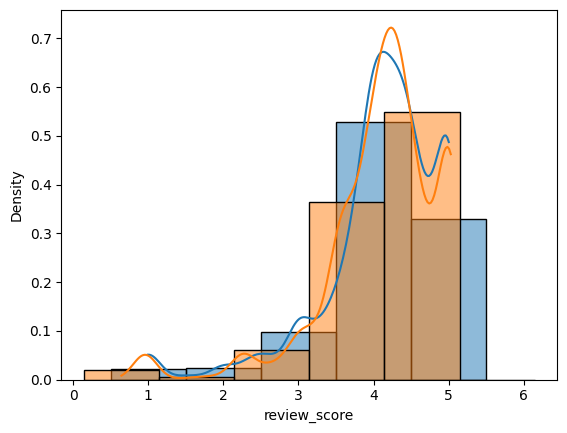

In [31]:
sns.histplot(sellers.review_score, kde=True, stat="density", discrete=True)
sns.histplot(model.predict(sellers_standardized[features]), kde=True, stat="density", discrete=True)

👉 Visualize the residuals

<Axes: ylabel='Density'>

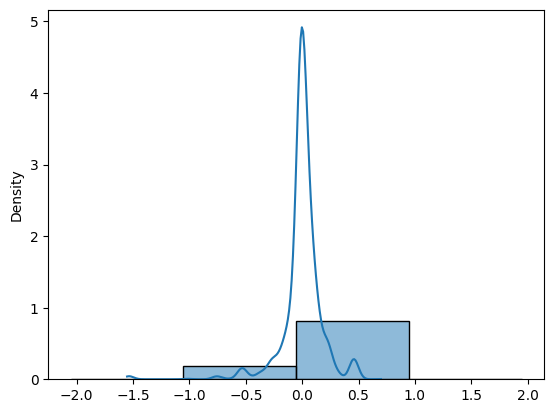

In [32]:
sns.histplot(model.resid, kde=True, stat="density", discrete=True)

### (2.3) Add `seller_state` to the analysis

❓ We haven't used `seller_state` yet.  
- Build a new OLS that models `review_score` only against `seller_state`.
- Use the `return_significative_coef(model)` function in `olist/utils.py` to analyze significant features.
- Which states are the best in terms of `review_score`?

<details>
    <summary>- Tips -</summary>
        
⚠️ Note that `seller_state` is a categorical feature. 
    
💡 In formulas, use `C(a_cat_feature)` for categorical variables. This will create a boolean variable (`is_cat_feature_xx`) for each unique category.

</details>

In [33]:
model2 = smf.ols(formula="review_score ~ C(seller_state)", data=sellers).fit()

from olist.utils import return_significative_coef
return_significative_coef(model2).tail() 

,variable,p_value,coef
12,C(seller_state)[T.PE],0.034272,1.790505
1,C(seller_state)[T.BA],0.032244,1.765397
15,C(seller_state)[T.RJ],0.028329,1.764926
21,C(seller_state)[T.SP],0.030263,1.739092
3,C(seller_state)[T.DF],0.037286,1.698757


☝️ It seems some states have significantly better average reviews than others.

🤔 Is this due to lower `quantity_per_order`, shorter `wait_time`, or `delay_to_carrier`? Or could it be other factors we don't have?

❓ **Try to isolate the `seller_state` effect from the others: add other continuous features to your OLS model until `seller_state` is no longer statistically significant!**

In [35]:
model3 = smf.ols(formula="review_score ~  sales + quantity + quantity_per_order + C(seller_state)", 
                 data=sellers).fit()
return_significative_coef(model3).head(5+1)[1:]

,variable,p_value,coef
16,C(seller_state)[T.RN],0.014324,2.149557
4,C(seller_state)[T.ES],0.010663,2.092107
8,C(seller_state)[T.MS],0.025847,1.955813
11,C(seller_state)[T.PB],0.025231,1.936561
9,C(seller_state)[T.MT],0.034297,1.895816


In [36]:
formula = "review_score ~ wait_time + C(seller_state)"
model3 = smf.ols(formula=formula, data=sellers).fit()
return_significative_coef(model3).head(5+1)[1:]

,variable,p_value,coef
22,wait_time,1.828207e-124,-0.047702


☝️ After adding `wait_time` to the analysis, none of the 22 `is_seller_state_xx` dummy variables are statistically significant:

Given our small dataset (very few sellers in most states):
- We cannot conclude that "some states are naturally better than others for reasons other than `wait_time`".
- In other words, we cannot reject the hypothesis that "`seller_state` has no effect on `review_score` beyond `wait_time`".

🏁 Congratulations!

💾 Commit and push:
- your `sellers.ipynb` notebook
- and your `seller.py` file